In [65]:
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
from os import listdir
from os.path import isfile, join
from os import walk
import matplotlib.pyplot as plt
import statsbomb as sb

ModuleNotFoundError: No module named 'statsbomb'

In [2]:
def getJsonPaths(path):
    json_files = []
#     print(path)
    for (dirpath, dirnames, filenames) in walk(path):
        json_files.extend(filenames)
        break
    return json_files

def getDirPath(path):
    dir_files = []
#     print(path)
    for (dirpath, dirnames, filenames) in walk(path):
        dir_files.extend(dirnames)
        break
        
    #print(dir_files)
    return dir_files

There are 799 matches total in this dataset
2018/2019    141
2018         101
2019/2020     87
2019          52
2014/2015     38
2011/2012     37
2017/2018     36
2009/2010     35
2016/2017     34
2010/2011     33
2015/2016     33
2012/2013     32
2008/2009     31
2013/2014     31
2007/2008     28
2006/2007     26
2005/2006     17
2004/2005      7
Name: season_year, dtype: int64


season_year,2004/2005,2005/2006,2006/2007,2007/2008,2008/2009,2009/2010,2010/2011,2011/2012,2012/2013,2013/2014,2014/2015,2015/2016,2016/2017,2017/2018,2018,2018/2019,2019,2019/2020
EPL_game,,,,,,,,,,,,,,,,,,
0,7,17,26,28,31,35,33,37,32,31,38,33,34,36,101,34,52,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,107,0,87


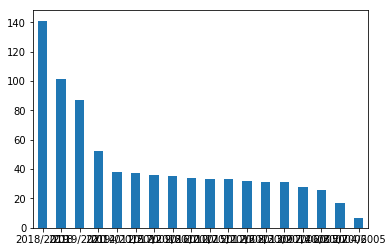

In [34]:
# Get json files
data_dir = "/Users/alexanderfoster/Documents/GitHub/open-data-master/data"
events_json = getJsonPaths(data_dir+'/events')
lineups_json = getJsonPaths(data_dir+'/lineups')

matches_path = data_dir+"/matches/"

matches_dirs = getDirPath(matches_path)

matches_json = []
df_matches = pd.DataFrame()
total_matches = 0 
dates = []
for m_dir in matches_dirs:
    matches_json = getJsonPaths(matches_path+str(m_dir))
    count = 0
    
    for file in matches_json:
        #print(matches_path+str(m_dir)+'/'+file)
        new_df = pd.read_json(matches_path+str(m_dir)+'/'+file)
        df_matches = pd.concat([df_matches,new_df])
        dates += list(new_df['match_date'].values)
        total_matches +=  new_df.shape[0]
        count+=1

    #print(matches_path+str(m_dir)+' had '+str(count)+' json files')
print('There are '+str(total_matches)+' matches total in this dataset')

# Create dates into datetime objects
# df_matches['match_date'] = pd.to_datetime(df_matches['match_date'])
# df_matches['month'] = df_matches.apply(lambda row: row.match_date.month, axis = 1)
# df_matches['year'] = df_matches.apply(lambda row: row.match_date.year, axis = 1)

season = []
EPL_game = []
for idx,row in df_matches.iterrows():
    season += [row.season['season_name']]
    EPL_game += [1 if row.competition['country_name'] == 'England' else 0]
df_matches['season_year'] =season
df_matches['EPL_game'] = EPL_game

df_matches
x = df_matches['season_year'].value_counts()


ax = x.plot.bar(rot=0,fill='EPL_game') # disgusting plot
print(x)
pd.crosstab(index=df_matches['EPL_game'], columns=df_matches['season_year'])

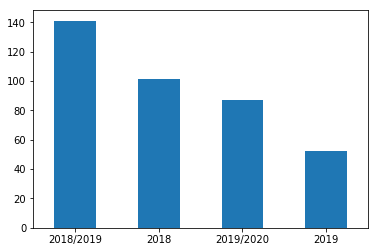

In [36]:
df_mini_england = df_matches[(df_matches['season_year']== '2018/2019') |                 
                     (df_matches['season_year']== '2019/2020')]
df_mini = df_matches[(df_matches['season_year']== '2018/2019') |
                     (df_matches['season_year']== '2018') | 
                     (df_matches['season_year']== '2019/2020')|
                     (df_matches['season_year']== '2019')]
df_mini['season_year'].value_counts()
x_mini = df_mini['season_year'].value_counts()
ax_mini = x_mini.plot.bar(rot=0) # disgusting plot


In [25]:
df_mini.iloc[0]

match_id                                                         16215
match_date                                                  2019-03-17
kick_off                                                  20:45:00.000
competition          {'competition_id': 11, 'country_name': 'Spain'...
season                    {'season_id': 4, 'season_name': '2018/2019'}
home_team            {'home_team_id': 218, 'home_team_name': 'Real ...
away_team            {'away_team_id': 217, 'away_team_name': 'Barce...
home_score                                                           1
away_score                                                           4
match_status                                                 available
last_updated                                2019-12-16T23:09:16.168756
metadata             {'data_version': '1.1.0', 'shot_fidelity_versi...
match_week                                                          28
competition_stage                  {'id': 1, 'name': 'Regular Season'}
stadiu

In [61]:
print(df_matches.columns)

for x in events_json:
    for y in list(df_matches['match_id']):
        if x == y:
            print('yeeet')
        

def get_match_events(df_match, events_json=events_json):
    for idx,row in df_match.iterrows():
        for file in events_json:
            print(file.split('.')[0], row['match_id'])
            if row['match_id'] == file.split('.')[0]:
                print('yeet')
                
        break
                
#get_match_events(df_mini)
    

Index(['match_id', 'match_date', 'kick_off', 'competition', 'season',
       'home_team', 'away_team', 'home_score', 'away_score', 'match_status',
       'last_updated', 'metadata', 'match_week', 'competition_stage',
       'stadium', 'referee', 'season_year', 'EPL_game'],
      dtype='object')


In [64]:

#df_matches = pd.read_json(matches_path+'/'+matches_json[0])

df_event = pd.read_json(data_dir+"/events/"+events_json[0])
df_lineups = pd.read_json(data_dir+"/lineups/"+lineups_json[1])


df_event.iloc[210]

id                              fdc6fb59-e15f-4b2e-bd2c-68cb08673eb2
index                                                            211
period                                                             1
timestamp                                 2020-04-09 00:06:17.984000
minute                                                             6
second                                                            17
type                                      {'id': 30, 'name': 'Pass'}
possession                                                        20
possession_team                   {'id': 974, 'name': 'Reading WFC'}
play_pattern                       {'id': 1, 'name': 'Regular Play'}
team                              {'id': 974, 'name': 'Reading WFC'}
duration                                                     2.85485
tactics                                                          NaN
related_events     [9279e103-9d0c-4d65-989c-3bbedac76b48, d945c28...
player                       {'id'